**Set up the environment

In the following steps, we ensure that our workspace is equipped with the necessary tools for data manipulation, visualization, and statistical analysis.

In [1]:
from tqdm.auto import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import stats
import seaborn as sns

**Load the data set and use mapping of response labels

Source of data set: https://www.cdc.gov/brfss/annual_data/annual_2023.html

In [2]:
# Load BRFSS data
df_survey = pd.read_csv(r"C:\Users\jberin\usable_ai\project\data\LLCP2023.csv")

# Preview
df_survey.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV
0,1.0,1.0,3012023,3,1,2023,1100.0,2023000001,2.023000e+09,1.0,...,0.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,9.0
1,1.0,1.0,1062023,1,6,2023,1100.0,2023000002,2.023000e+09,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,9.0
2,1.0,1.0,3082023,3,8,2023,1100.0,2023000003,2.023000e+09,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,9.0
3,1.0,1.0,3062023,3,6,2023,1100.0,2023000004,2.023000e+09,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0
4,1.0,1.0,1062023,1,6,2023,1100.0,2023000005,2.023000e+09,1.0,...,7.0,1.0,47.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0


**Data Familiarization

Identify data types: Understand what kind of data each column holds (e.g., numerical, categorical).

Count entries: Check the total number of rows to gauge the dataset's size.

Examine ranges: Look at the minimum and maximum values for numerical columns.

Sample entries: Display a few rows to visually inspect the data.

Review unique values: For categorical variables, list unique values to understand the diversity in the data.

In [3]:
# See info
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433323 entries, 0 to 433322
Columns: 350 entries, _STATE to _DRNKDRV
dtypes: float64(345), int64(5)
memory usage: 1.1 GB


In [4]:
# 433,323  records | 350 columns

# See info as a data frame
df_info = pd.DataFrame({
    'Column': df_survey.columns,
    'Null Count': df_survey.isnull().sum().values,
    'Dtype': df_survey.dtypes.values
})

# Print all
with pd.option_context('display.max_rows', None):
    print(df_info)

       Column  Null Count    Dtype
0      _STATE           0  float64
1      FMONTH           0  float64
2       IDATE           0    int64
3      IMONTH           0    int64
4        IDAY           0    int64
5       IYEAR           0    int64
6    DISPCODE           0  float64
7       SEQNO           0    int64
8        _PSU           0  float64
9    CTELENM1      344978  float64
10   PVTRESD1      344978  float64
11   COLGHOUS      433311  float64
12   STATERE1      344978  float64
13   CELPHON1      344977  float64
14    LADULT1      344978  float64
15   NUMADULT      344993  float64
16   RESPSLC1      380937  float64
17   LANDSEX2      362850  float64
18   LNDSXBRT      433154  float64
19   SAFETIME       88345  float64
20   CTELNUM1       88345  float64
21   CELLFON5       88345  float64
22    CADULT1       88345  float64
23   CELLSEX2       88347  float64
24   CELSXBRT      430745  float64
25   PVTRESD3       88345  float64
26   CCLGHOUS      431972  float64
27    CSTATE1       

In [8]:
# Load mapping dictionary
df_map = pd.read_csv(r"C:\Users\jberin\usable_ai\project\data\2023_Mapping_Dictionary.csv")

# Create a dictionary of dictionaries: {column: {value: label}}
mapping_dict = {
    var: grp.set_index("Value")["Value_Label"].to_dict()
    for var, grp in df_map.groupby("Variable_Name")
}

# Make a copy of the original to preserve raw values if needed
df_survey_labeled = df_survey.copy()

# Apply the mapping to relevant columns
for col in df_survey.columns:
    if col in mapping_dict:
        df_survey_labeled[col] = df_survey[col].map(mapping_dict[col])

#print (df_survey_labeled)
df_survey_labeled.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV
0,Alabama,January,3012023,March,Interview Day,408012,Completed Interview,2023000001,2.023000e+09,"Yes - Go to LL.02, PVTRESD1",...,No Drink-Occasions per day Notes: ALCDAY4 = 888,No\nNotes: ALCDAY4<231 and DRNK3GE5=88; or ALC...,Did not drink\nNotes: DROCDY4_=0 or AVEDRNK3=88,No\nNotes: (SEXVAR=1) and _DRNKWK2 <= 1400 or ...,No\nNotes: AGE >=65 and FLUSHOT7 = 2,No\nNotes: AGE >= 65 and PNEUVAC4 = 2,No\nNotes: HIVTST7 = 2,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,Don't know/Not Sure/Refused/Missing
1,Alabama,January,1062023,January,15763,408012,Completed Interview,2023000002,2.023000e+09,"Yes - Go to LL.02, PVTRESD1",...,No Drink-Occasions per day Notes: ALCDAY4 = 888,No\nNotes: ALCDAY4<231 and DRNK3GE5=88; or ALC...,Did not drink\nNotes: DROCDY4_=0 or AVEDRNK3=88,No\nNotes: (SEXVAR=1) and _DRNKWK2 <= 1400 or ...,Yes\nNotes: AGE >=65 and FLUSHOT7 = 1,Yes\nNotes: AGE >= 65 and PNEUVAC4 = 1,No\nNotes: HIVTST7 = 2,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,Don't know/Not Sure/Refused/Missing
2,Alabama,January,3082023,March,15583,408012,Completed Interview,2023000003,2.023000e+09,"Yes - Go to LL.02, PVTRESD1",...,No Drink-Occasions per day Notes: ALCDAY4 = 888,No\nNotes: ALCDAY4<231 and DRNK3GE5=88; or ALC...,Did not drink\nNotes: DROCDY4_=0 or AVEDRNK3=88,No\nNotes: (SEXVAR=1) and _DRNKWK2 <= 1400 or ...,Yes\nNotes: AGE >=65 and FLUSHOT7 = 1,Yes\nNotes: AGE >= 65 and PNEUVAC4 = 1,No\nNotes: HIVTST7 = 2,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,Don't know/Not Sure/Refused/Missing
3,Alabama,January,3062023,March,15763,408012,Completed Interview,2023000004,2.023000e+09,"Yes - Go to LL.02, PVTRESD1",...,No Drink-Occasions per day Notes: ALCDAY4 = 888,No\nNotes: ALCDAY4<231 and DRNK3GE5=88; or ALC...,Did not drink\nNotes: DROCDY4_=0 or AVEDRNK3=88,No\nNotes: (SEXVAR=1) and _DRNKWK2 <= 1400 or ...,Yes\nNotes: AGE >=65 and FLUSHOT7 = 1,Yes\nNotes: AGE >= 65 and PNEUVAC4 = 1,Yes\nNotes: HIVTST7 = 1,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,Don't know/Not Sure/Refused/Missing
4,Alabama,January,1062023,January,15763,408012,Completed Interview,2023000005,2.023000e+09,"Yes - Go to LL.02, PVTRESD1",...,NaN,No\nNotes: ALCDAY4<231 and DRNK3GE5=88; or ALC...,NaN,No\nNotes: (SEXVAR=1) and _DRNKWK2 <= 1400 or ...,No\nNotes: AGE >=65 and FLUSHOT7 = 2,Yes\nNotes: AGE >= 65 and PNEUVAC4 = 1,No\nNotes: HIVTST7 = 2,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,Have not driven after having too much to drink


In [9]:
# How many completed the survey?

df_survey_labeled['DISPCODE'].value_counts()

DISPCODE
Completed Interview           356261
Partial Complete Interview     77062
Name: count, dtype: int64

In [10]:
# Isolate analysis to completed interviews only

df_completed = df_survey_labeled[df_survey_labeled['DISPCODE'] == 'Completed Interview']

In [15]:
# Count of people who reported having had a heart attack
mi_count = (df_completed['CVDINFR4'] == 'Yes').sum()

print(mi_count)

19572


In [14]:
# Count of people who reported having kidney disease
kd_count = (df_completed['CHCKDNY2'] == 'Yes').sum()

print(kd_count)

17546


In [17]:
# Count of people who reported both kidney disease and heart attack

dual_condition_count = ((df_completed['CHCKDNY2'] == 'Yes') & (df_completed['CVDINFR4'] == 'Yes')).sum()

print (dual_condition_count)

2967


In [33]:
# Age breakdown

df_survey_labeled['_AGE80'].value_counts()

_AGE80
80.0    38884
65.0    10050
70.0     9984
72.0     9437
67.0     9393
        ...  
22.0     3892
21.0     3704
20.0     3570
19.0     3568
18.0     3242
Name: count, Length: 63, dtype: int64

Heart Attack History Counts:
CVDINFR4
No                     334771
Yes                     19572
Don't know/Not sure      1760
Refused                   158
Name: count, dtype: int64

Kidney Disease History Counts:
CHCKDNY2
No                       337199
Yes                       17546
Don't know / Not sure      1336
Refused                     180
Name: count, dtype: int64


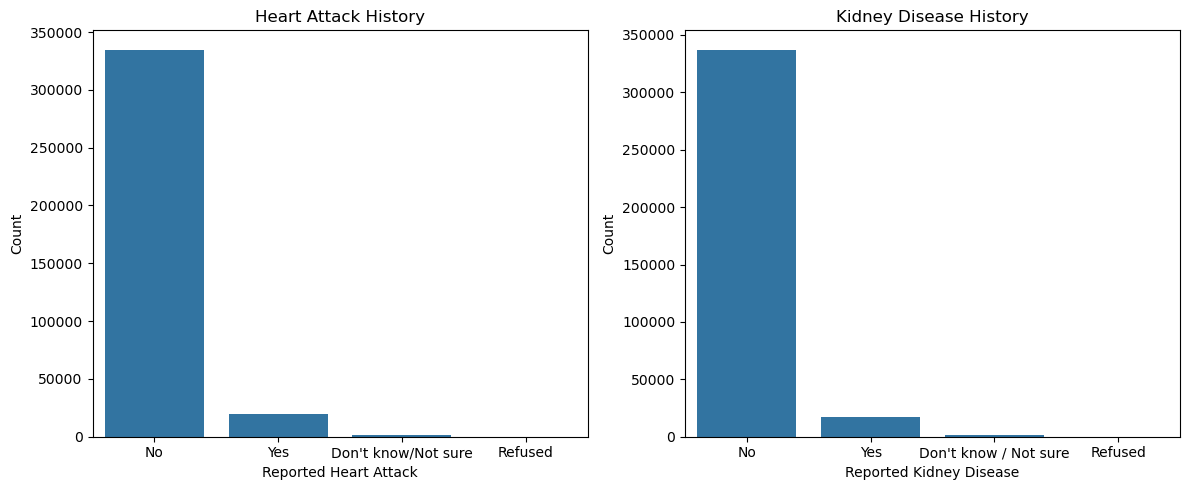

In [62]:
# Count values
heart_counts = df_completed['CVDINFR4'].value_counts()
kidney_counts = df_completed['CHCKDNY2'].value_counts()

# Print counts
print("Heart Attack History Counts:")
print(heart_counts)
print("\nKidney Disease History Counts:")
print(kidney_counts)

# Count plots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df_completed, x='CVDINFR4', order=heart_counts.index)
plt.title('Heart Attack History')
plt.xlabel('Reported Heart Attack')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=df_completed, x='CHCKDNY2', order=kidney_counts.index)
plt.title('Kidney Disease History')
plt.xlabel('Reported Kidney Disease')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Gender Distribution: Heart Attack
LANDSEX2
Male                   2888
Female                 2210
Refused                   5
Don't know/Not Sure       4
Name: count, dtype: int64 



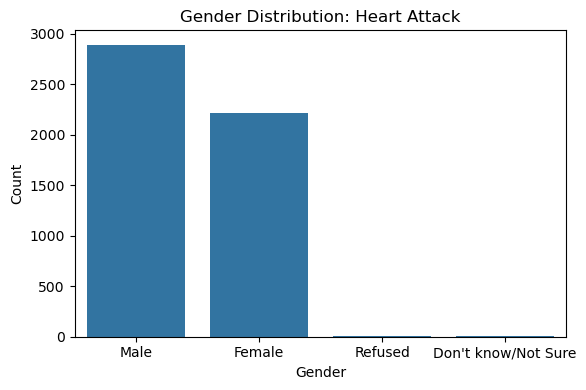

Gender Distribution: Kidney Disease
LANDSEX2
Female                 2780
Male                   1814
Don't know/Not Sure       4
Refused                   1
Name: count, dtype: int64 



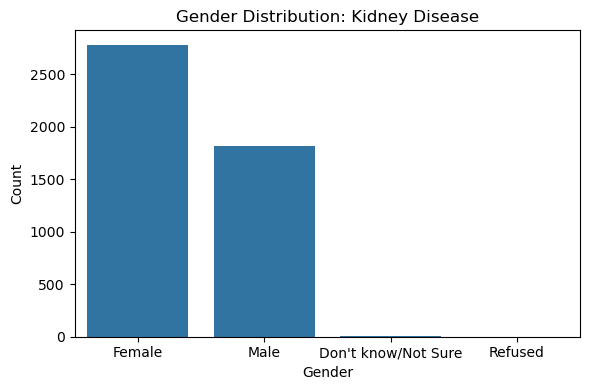

Gender Distribution: Both Heart Attack & Kidney Disease
LANDSEX2
Male                   448
Female                 382
Don't know/Not Sure      1
Name: count, dtype: int64 



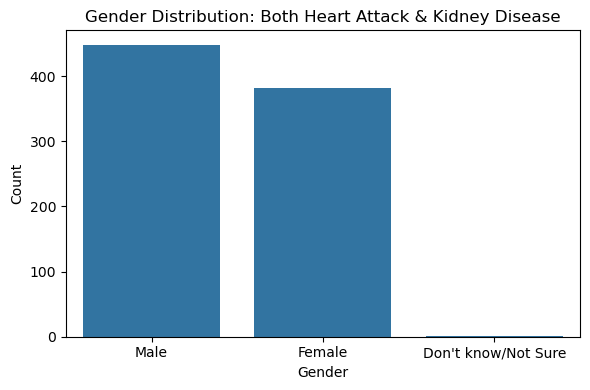

In [63]:
# Gender counts for heart attack
heart_gender_counts = df_completed[df_completed['CVDINFR4'] == 'Yes']['LANDSEX2'].value_counts()
print("Gender Distribution: Heart Attack")
print(heart_gender_counts, "\n")

# Plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df_completed[df_completed['CVDINFR4'] == 'Yes'], x='LANDSEX2', order=heart_gender_counts.index)
plt.title('Gender Distribution: Heart Attack')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Gender counts for kidney disease
kidney_gender_counts = df_completed[df_completed['CHCKDNY2'] == 'Yes']['LANDSEX2'].value_counts()
print("Gender Distribution: Kidney Disease")
print(kidney_gender_counts, "\n")

# Plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df_completed[df_completed['CHCKDNY2'] == 'Yes'], x='LANDSEX2', order=kidney_gender_counts.index)
plt.title('Gender Distribution: Kidney Disease')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Gender counts for both conditions
dual_gender_counts = df_completed[(df_completed['CHCKDNY2'] == 'Yes') & (df_completed['CVDINFR4'] == 'Yes')]['LANDSEX2'].value_counts()
print("Gender Distribution: Both Heart Attack & Kidney Disease")
print(dual_gender_counts, "\n")

# Plot
plt.figure(figsize=(6, 4))
sns.countplot(
    data=df_completed[(df_completed['CHCKDNY2'] == 'Yes') & (df_completed['CVDINFR4'] == 'Yes')],
    x='LANDSEX2',
    order=dual_gender_counts.index
)
plt.title('Gender Distribution: Both Heart Attack & Kidney Disease')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Age Group Distribution: Heart Attack
AGE_BUCKET
18–29     154
30–39     339
40–49     855
50–59    2411
60–69    5005
70–79    6562
80+      4246
Name: count, dtype: int64 



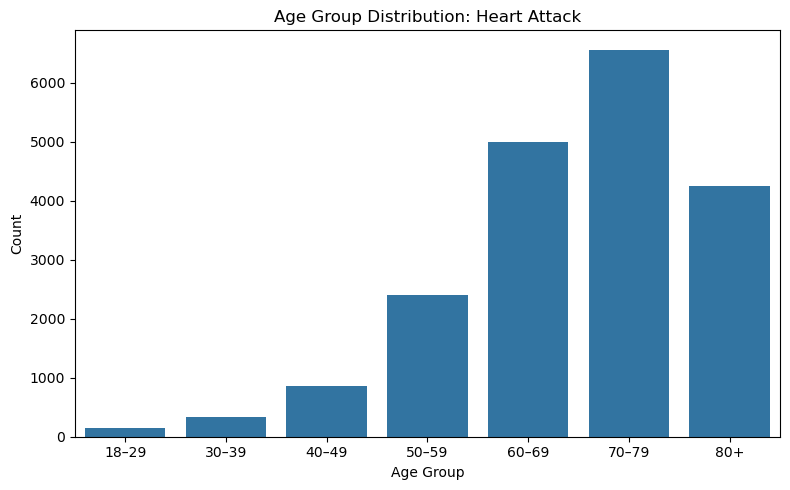

Age Group Distribution: Kidney Disease
AGE_BUCKET
18–29     290
30–39     494
40–49     980
50–59    2223
60–69    4122
70–79    5817
80+      3620
Name: count, dtype: int64 



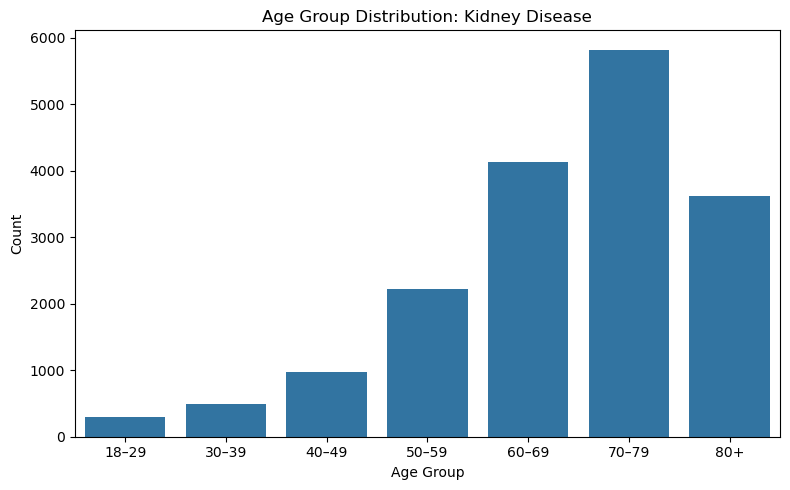

Age Group Distribution: Both Heart Attack & Kidney Disease
AGE_BUCKET
18–29      10
30–39      30
40–49      93
50–59     342
60–69     701
70–79    1067
80+       724
Name: count, dtype: int64 



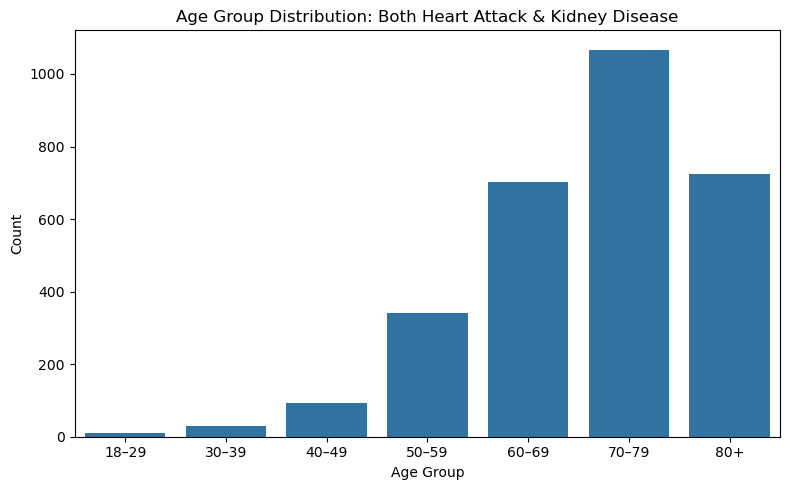

In [64]:
# Age group counts for heart attack
heart_age_counts = df_completed[df_completed['CVDINFR4'] == 'Yes']['AGE_BUCKET'].value_counts().reindex(age_labels)
print("Age Group Distribution: Heart Attack")
print(heart_age_counts, "\n")

plt.figure(figsize=(8, 5))
sns.countplot(data=df_completed[df_completed['CVDINFR4'] == 'Yes'], x='AGE_BUCKET', order=age_labels)
plt.title('Age Group Distribution: Heart Attack')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Age group counts for kidney disease
kidney_age_counts = df_completed[df_completed['CHCKDNY2'] == 'Yes']['AGE_BUCKET'].value_counts().reindex(age_labels)
print("Age Group Distribution: Kidney Disease")
print(kidney_age_counts, "\n")

plt.figure(figsize=(8, 5))
sns.countplot(data=df_completed[df_completed['CHCKDNY2'] == 'Yes'], x='AGE_BUCKET', order=age_labels)
plt.title('Age Group Distribution: Kidney Disease')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Age group counts for both conditions
dual_age_counts = df_completed[(df_completed['CHCKDNY2'] == 'Yes') & (df_completed['CVDINFR4'] == 'Yes')]['AGE_BUCKET'].value_counts().reindex(age_labels)
print("Age Group Distribution: Both Heart Attack & Kidney Disease")
print(dual_age_counts, "\n")

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_completed[(df_completed['CHCKDNY2'] == 'Yes') & (df_completed['CVDINFR4'] == 'Yes')],
    x='AGE_BUCKET', order=age_labels
)
plt.title('Age Group Distribution: Both Heart Attack & Kidney Disease')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [41]:
# Average age of those with heart attack
mdn_age_mi = df_completed.loc[df_completed['CVDINFR4'] == 'Yes', '_AGE80'].median()

# Average age of those with kidney disease
mdn_age_kd = df_completed.loc[df_completed['CHCKDNY2'] == 'Yes', '_AGE80'].median()

# Average age of those with both conditions
mdn_age_both = df_completed.loc[
    (df_completed['CHCKDNY2'] == 'Yes') & (df_completed['CVDINFR4'] == 'Yes'),
    '_AGE80'
].median()

print(f"Median age of those with heart attack: {mdn_age_mi:.2f}")
print(f"Median age of those with kidney disease: {mdn_age_kd:.2f}")
print(f"Median age of those with both conditions: {mdn_age_both:.2f}")

Median age of those with heart attack: 71.00
Median age of those with kidney disease: 71.00
Median age of those with both conditions: 73.00


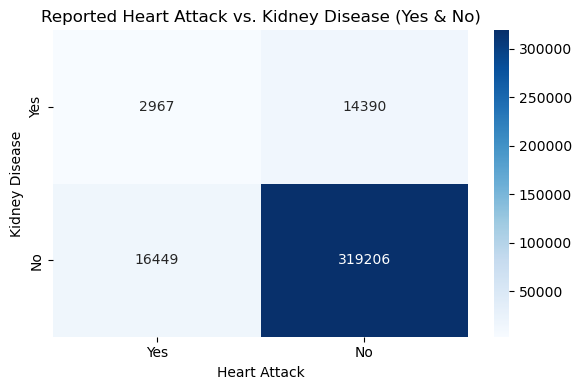

In [39]:
# Create a crosstab showing Yes/No combinations
ct = pd.crosstab(
    df_completed['CHCKDNY2'], 
    df_completed['CVDINFR4'], 
    rownames=['Kidney Disease'], 
    colnames=['Heart Attack']
)

ct_yes_responses = ct.loc[['Yes', 'No'], ['Yes', 'No']]

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(ct_yes_responses, annot=True, fmt='d', cmap='Blues')
plt.title('Reported Heart Attack vs. Kidney Disease (Yes & No)')
plt.tight_layout()
plt.show()

In [56]:
# Step 1: Create binary outcome column
df_survey["MI_YES"] = (df_survey["CVDINFR4"] == 1).astype(int)

# Define invalid BRFSS values
invalid_values = [7, 8, 9, 77, 88, 99]

# ===============================
# Lifestyle Factors Correlation
# ===============================
lifestyle_cols = ["SMOKE100", "EXERANY2", "DRNKANY6"]
df_lifestyle = df_survey[lifestyle_cols + ["MI_YES"]].replace(invalid_values, np.nan).dropna()

print("Correlation with Heart Attack (Lifestyle Factors):")
for col in lifestyle_cols:
    corr, p = stats.pointbiserialr(df_lifestyle["MI_YES"], df_lifestyle[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")

# ===============================
# Chronic Conditions Correlation
# ===============================
chronic_cols = ["DIABETE4", "CHCCOPD3", "CVDSTRK3", "CVDCRHD4", "BPMEDS1", "TOLDHI3"]
df_chronic = df_survey[chronic_cols + ["MI_YES"]].replace(invalid_values, np.nan).dropna()

print("\nCorrelation with Heart Attack (Chronic Conditions):")
for col in chronic_cols:
    corr, p = stats.pointbiserialr(df_chronic["MI_YES"], df_chronic[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")

# ===============================
# Socioeconomic Factors Correlation
# ===============================
social_cols = ["INCOME3", "EMPLOY1", "PRIMINS1", "MEDCOST1"]
df_social = df_survey[social_cols + ["MI_YES"]].replace(invalid_values, np.nan).dropna()

print("\nCorrelation with Heart Attack (Socioeconomic Factors):")
for col in social_cols:
    corr, p = stats.pointbiserialr(df_social["MI_YES"], df_social[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")


Correlation with Heart Attack (Lifestyle Factors):
SMOKE100: correlation = -0.103, p-value = 0.0000
EXERANY2: correlation = 0.086, p-value = 0.0000
DRNKANY6: correlation = 0.065, p-value = 0.0000

Correlation with Heart Attack (Chronic Conditions):
DIABETE4: correlation = -0.102, p-value = 0.0000
CHCCOPD3: correlation = -0.126, p-value = 0.0000
CVDSTRK3: correlation = -0.172, p-value = 0.0000
CVDCRHD4: correlation = -0.434, p-value = 0.0000
BPMEDS1: correlation = -0.070, p-value = 0.0000
TOLDHI3: correlation = -0.094, p-value = 0.0000

Correlation with Heart Attack (Socioeconomic Factors):
INCOME3: correlation = -0.063, p-value = 0.0000
EMPLOY1: correlation = 0.020, p-value = 0.0000
PRIMINS1: correlation = 0.045, p-value = 0.0000
MEDCOST1: correlation = -0.023, p-value = 0.0000


In [55]:
# Step 1: Create binary outcome column
df_survey["KD_YES"] = (df_survey["CHCKDNY2"] == 1).astype(int)

# Define BRFSS invalid values
invalid_values = [7, 8, 9, 77, 88, 99]

# ===============================
# Lifestyle Factors Correlation
# ===============================
lifestyle_cols = ["SMOKE100", "EXERANY2", "DRNKANY6"]
df_lifestyle = df_survey[lifestyle_cols + ["KD_YES"]].replace(invalid_values, np.nan).dropna()

print("Correlation with Kidney Disease (Lifestyle Factors):")
for col in lifestyle_cols:
    corr, p = stats.pointbiserialr(df_lifestyle["KD_YES"], df_lifestyle[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")

# ===============================
# Chronic Conditions Correlation
# ===============================
chronic_cols = ["DIABETE4", "CHCCOPD3", "CVDSTRK3", "CVDCRHD4", "BPMEDS1", "TOLDHI3"]
df_chronic = df_survey[chronic_cols + ["KD_YES"]].replace(invalid_values, np.nan).dropna()

print("\nCorrelation with Kidney Disease (Chronic Conditions):")
for col in chronic_cols:
    corr, p = stats.pointbiserialr(df_chronic["KD_YES"], df_chronic[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")

# ===============================
# Socioeconomic Factors Correlation
# ===============================
social_cols = ["INCOME3", "EMPLOY1", "PRIMINS1", "MEDCOST1"]
df_social = df_survey[social_cols + ["KD_YES"]].replace(invalid_values, np.nan).dropna()

print("\nCorrelation with Kidney Disease (Socioeconomic Factors):")
for col in social_cols:
    corr, p = stats.pointbiserialr(df_social["KD_YES"], df_social[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")

Correlation with Kidney Disease (Lifestyle Factors):
SMOKE100: correlation = -0.039, p-value = 0.0000
EXERANY2: correlation = 0.089, p-value = 0.0000
DRNKANY6: correlation = 0.082, p-value = 0.0000

Correlation with Kidney Disease (Chronic Conditions):
DIABETE4: correlation = -0.141, p-value = 0.0000
CHCCOPD3: correlation = -0.083, p-value = 0.0000
CVDSTRK3: correlation = -0.084, p-value = 0.0000
CVDCRHD4: correlation = -0.138, p-value = 0.0000
BPMEDS1: correlation = -0.066, p-value = 0.0000
TOLDHI3: correlation = -0.057, p-value = 0.0000

Correlation with Kidney Disease (Socioeconomic Factors):
INCOME3: correlation = -0.053, p-value = 0.0000
EMPLOY1: correlation = 0.034, p-value = 0.0000
PRIMINS1: correlation = 0.032, p-value = 0.0000
MEDCOST1: correlation = -0.017, p-value = 0.0000


In [57]:
# Step 1: Create binary outcome columns
df_survey["MI_YES"] = (df_survey["CVDINFR4"] == 1).astype(int)
df_survey["KD_YES"] = (df_survey["CHCKDNY2"] == 1).astype(int)
df_survey["DUAL_DIAGNOSIS"] = ((df_survey["MI_YES"] == 1) & (df_survey["KD_YES"] == 1)).astype(int)

# Define invalid BRFSS codes
invalid_values = [7, 8, 9, 77, 88, 99]

# ===============================
# Lifestyle Factors Correlation
# ===============================
lifestyle_cols = ["SMOKE100", "EXERANY2", "DRNKANY6"]
df_lifestyle = df_survey[lifestyle_cols + ["DUAL_DIAGNOSIS"]].replace(invalid_values, np.nan).dropna()

print("Correlation with Dual Diagnosis (Lifestyle Factors):")
for col in lifestyle_cols:
    corr, p = stats.pointbiserialr(df_lifestyle["DUAL_DIAGNOSIS"], df_lifestyle[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")

# ===============================
# Chronic Conditions Correlation
# ===============================
chronic_cols = ["DIABETE4", "CHCCOPD3", "CVDSTRK3", "CVDCRHD4", "BPMEDS1", "TOLDHI3"]
df_chronic = df_survey[chronic_cols + ["DUAL_DIAGNOSIS"]].replace(invalid_values, np.nan).dropna()

print("\nCorrelation with Dual Diagnosis (Chronic Conditions):")
for col in chronic_cols:
    corr, p = stats.pointbiserialr(df_chronic["DUAL_DIAGNOSIS"], df_chronic[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")

# ===============================
# Socioeconomic Factors Correlation
# ===============================
social_cols = ["INCOME3", "EMPLOY1", "PRIMINS1", "MEDCOST1"]
df_social = df_survey[social_cols + ["DUAL_DIAGNOSIS"]].replace(invalid_values, np.nan).dropna()

print("\nCorrelation with Dual Diagnosis (Socioeconomic Factors):")
for col in social_cols:
    corr, p = stats.pointbiserialr(df_social["DUAL_DIAGNOSIS"], df_social[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")


Correlation with Dual Diagnosis (Lifestyle Factors):
SMOKE100: correlation = -0.036, p-value = 0.0000
EXERANY2: correlation = 0.057, p-value = 0.0000
DRNKANY6: correlation = 0.046, p-value = 0.0000

Correlation with Dual Diagnosis (Chronic Conditions):
DIABETE4: correlation = -0.092, p-value = 0.0000
CHCCOPD3: correlation = -0.074, p-value = 0.0000
CVDSTRK3: correlation = -0.099, p-value = 0.0000
CVDCRHD4: correlation = -0.227, p-value = 0.0000
BPMEDS1: correlation = -0.032, p-value = 0.0000
TOLDHI3: correlation = -0.045, p-value = 0.0000

Correlation with Dual Diagnosis (Socioeconomic Factors):
INCOME3: correlation = -0.029, p-value = 0.0000
EMPLOY1: correlation = 0.019, p-value = 0.0000
PRIMINS1: correlation = 0.016, p-value = 0.0000
MEDCOST1: correlation = -0.007, p-value = 0.0487


Correlation with Dual Diagnosis:
DRNKANY6    0.053
EXERANY2    0.052
EMPLOY1     0.036
PRIMINS1    0.027
MEDCOST1   -0.008
SMOKE100   -0.022
TOLDHI3    -0.030
BPMEDS1    -0.036
INCOME3    -0.042
CHCCOPD3   -0.050
CVDSTRK3   -0.064
DIABETE4   -0.074
CVDCRHD4   -0.168
Name: DUAL_DIAGNOSIS, dtype: float64




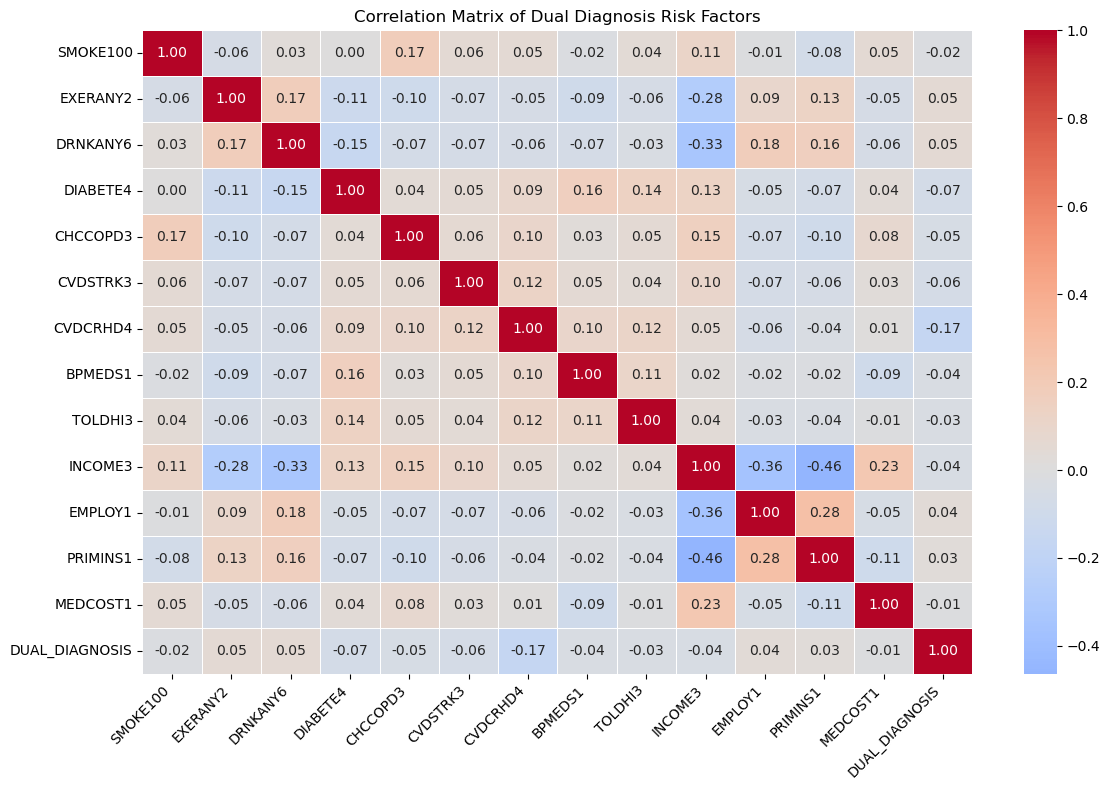

In [58]:
# Combine all relevant columns into one DataFrame
all_cols = [
    "SMOKE100", "EXERANY2", "DRNKANY6",                   # Lifestyle
    "DIABETE4", "CHCCOPD3", "CVDSTRK3", "CVDCRHD4",       # Chronic
    "BPMEDS1", "TOLDHI3",
    "INCOME3", "EMPLOY1", "PRIMINS1", "MEDCOST1",         # Socioeconomic
    "DUAL_DIAGNOSIS"
]

# Replace invalid BRFSS codes and drop missing
invalid_values = [7, 8, 9, 77, 88, 99]
df_corr = df_survey[all_cols].replace(invalid_values, np.nan).dropna()

# --- Print correlation of each variable with DUAL_DIAGNOSIS ---
print("Correlation with Dual Diagnosis:")
correlations = df_corr.corr()["DUAL_DIAGNOSIS"].drop("DUAL_DIAGNOSIS")
print(correlations.sort_values(ascending=False).round(3))
print("\n")

# --- Plot the full correlation matrix ---
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Matrix of Dual Diagnosis Risk Factors")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Create binary flags
df_completed["MI_YES"] = (df_completed["CVDINFR4"] == "Yes").astype(int)
df_completed["KD_YES"] = (df_completed["CHCKDNY2"] == "Yes").astype(int)
df_completed["DUAL_DIAGNOSIS"] = ((df_completed["MI_YES"] == 1) & (df_completed["KD_YES"] == 1)).astype(int)

# Assign condition group
df_completed["CONDITION_GROUP"] = "Neither"
df_completed.loc[(df_completed["KD_YES"] == 1) & (df_completed["MI_YES"] == 0), "CONDITION_GROUP"] = "Kidney Only"
df_completed.loc[(df_completed["KD_YES"] == 0) & (df_completed["MI_YES"] == 1), "CONDITION_GROUP"] = "Heart Attack Only"
df_completed.loc[df_completed["DUAL_DIAGNOSIS"] == 1, "CONDITION_GROUP"] = "Dual Dx"


lifestyle_cols = ["SMOKE100", "EXERANY2", "DRNKANY6"]
chronic_cols = ["DIABETE4", "CHCCOPD3", "CVDSTRK3", "BPHIGH6", "CVDCRHD4", "BPMEDS1", "TOLDHI3"]
social_cols = ["INCOME3", "EMPLOY1", "PRIMINS1", "MEDCOST1"]

Correlation with Heart Attack (MI_YES):
SMOKE100   NaN
EXERANY2   NaN
DRNKANY6   NaN
DIABETE4   NaN
CHCCOPD3   NaN
CVDSTRK3   NaN
CVDCRHD4   NaN
BPMEDS1    NaN
TOLDHI3    NaN
INCOME3    NaN
EMPLOY1    NaN
PRIMINS1   NaN
MEDCOST1   NaN
Name: MI_YES, dtype: float64




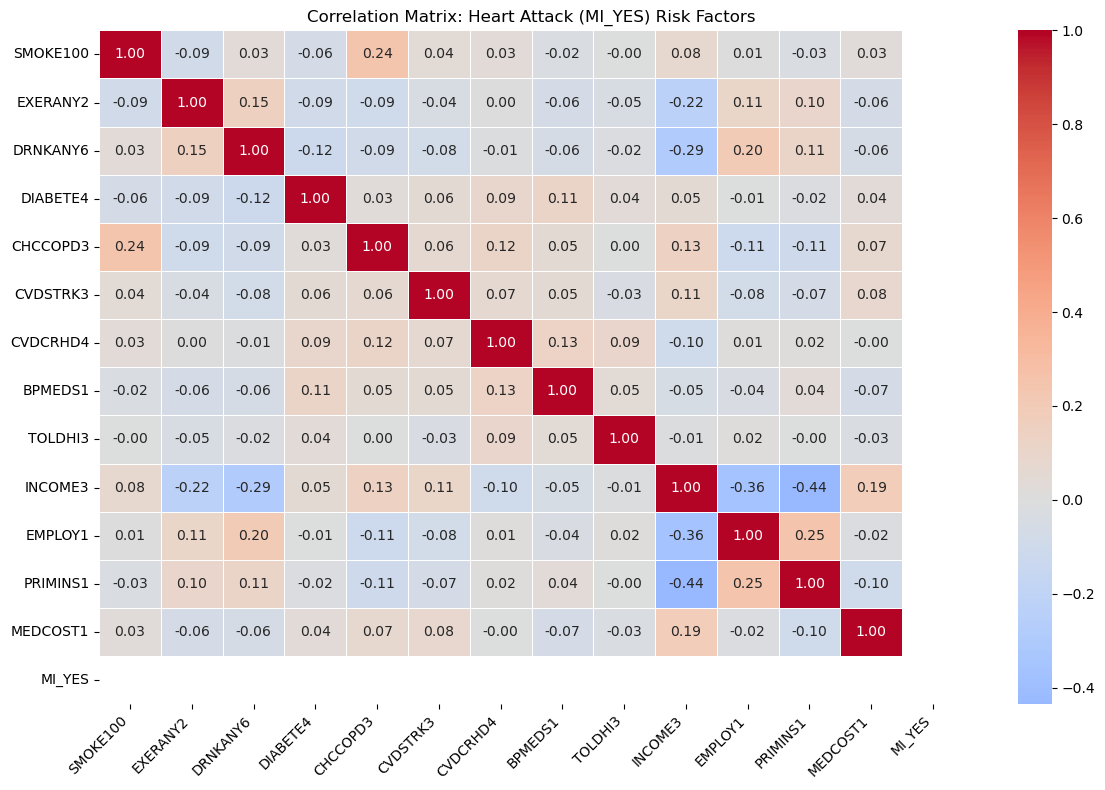

In [59]:
# Step 1: Create binary column for heart attack
df_survey["MI_YES"] = (df_survey["CVDINFR4"] == 1).astype(int)

# Step 2: Filter for heart attack only (exclude dual diagnosis)
df_mi_only = df_survey[(df_survey["MI_YES"] == 1) & (df_survey["CHCKDNY2"] != 1)].copy()

# Step 3: Define relevant columns
all_cols_mi = [
    "SMOKE100", "EXERANY2", "DRNKANY6",                # Lifestyle
    "DIABETE4", "CHCCOPD3", "CVDSTRK3", "CVDCRHD4",
    "BPMEDS1", "TOLDHI3",                              # Chronic
    "INCOME3", "EMPLOY1", "PRIMINS1", "MEDCOST1",      # Socioeconomic
    "MI_YES"
]

# Step 4: Clean BRFSS invalid values and drop missing
invalid_values = [7, 8, 9, 77, 88, 99]
df_mi_clean = df_mi_only[all_cols_mi].replace(invalid_values, np.nan).dropna()

# Step 5: Print correlation results with MI_YES
print("Correlation with Heart Attack (MI_YES):")
mi_corrs = df_mi_clean.corr()["MI_YES"].drop("MI_YES")
print(mi_corrs.sort_values(ascending=False).round(3))
print("\n")

# Step 6: Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_mi_clean.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Matrix: Heart Attack (MI_YES) Risk Factors")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Correlation with Kidney Disease (KD_YES):
SMOKE100   NaN
EXERANY2   NaN
DRNKANY6   NaN
DIABETE4   NaN
CHCCOPD3   NaN
CVDSTRK3   NaN
CVDCRHD4   NaN
BPMEDS1    NaN
TOLDHI3    NaN
INCOME3    NaN
EMPLOY1    NaN
PRIMINS1   NaN
MEDCOST1   NaN
Name: KD_YES, dtype: float64




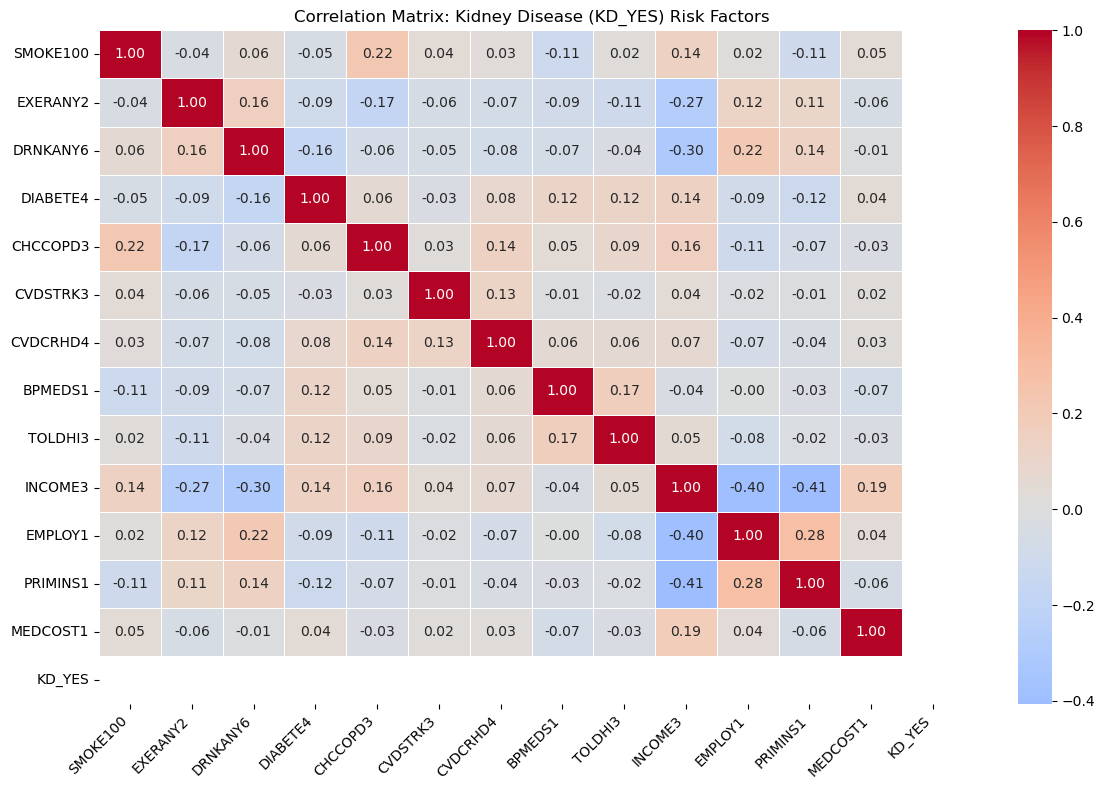

In [61]:
# Step 1: Create binary columns
df_survey["KD_YES"] = (df_survey["CHCKDNY2"] == 1).astype(int)
df_survey["MI_YES"] = (df_survey["CVDINFR4"] == 1).astype(int)

# Step 2: Filter for kidney disease only (exclude dual diagnosis)
df_kd_only = df_survey[(df_survey["KD_YES"] == 1) & (df_survey["MI_YES"] != 1)].copy()

# Step 3: Define relevant columns
all_cols_kd = [
    "SMOKE100", "EXERANY2", "DRNKANY6",                # Lifestyle
    "DIABETE4", "CHCCOPD3", "CVDSTRK3", "CVDCRHD4",
    "BPMEDS1", "TOLDHI3",                              # Chronic
    "INCOME3", "EMPLOY1", "PRIMINS1", "MEDCOST1",      # Socioeconomic
    "KD_YES"
]

# Step 4: Clean BRFSS invalid values and drop missing
invalid_values = [7, 8, 9, 77, 88, 99]
df_kd_clean = df_kd_only[all_cols_kd].replace(invalid_values, np.nan).dropna()

# Step 5: Print correlation results with KD_YES
print("Correlation with Kidney Disease (KD_YES):")
kd_corrs = df_kd_clean.corr()["KD_YES"].drop("KD_YES")
print(kd_corrs.sort_values(ascending=False).round(3))
print("\n")

# Step 6: Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_kd_clean.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Matrix: Kidney Disease (KD_YES) Risk Factors")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
